In [ ]:
import os

In [2]:
for _root, _dirs, _files in os.walk(".", topdown=False):
    print(_root, _dirs, _files)

.\.ipynb_checkpoints [] ['Untitled-checkpoint.ipynb']
.\datasets [] ['corona_tested_individuals_ver_0083.english.csv']
. ['.ipynb_checkpoints', 'datasets'] ['Untitled.ipynb']


In [3]:
_file = 'corona_tested_individuals_ver_0083.english.csv'
_relative_path = 'datasets'
_absolute_path =  """./{}/{}""".format(_relative_path, _file)
print(_absolute_path)

./datasets/corona_tested_individuals_ver_0083.english.csv


In [1]:
import pandas as pd

In [4]:
_dataframe = pd.read_csv(_absolute_path)

In [5]:
_dataframe

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
158601,2020-10-30,0,0,0,0,0,negative,NaN,male,Other
158602,2020-10-30,0,0,0,0,0,negative,NaN,female,Other
158603,2020-10-30,0,0,0,0,0,negative,NaN,male,Other
158604,2020-10-30,0,0,0,0,0,negative,NaN,female,Other


In [6]:
_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158606 entries, 0 to 158605
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   test_date            158606 non-null  object
 1   cough                158606 non-null  int64 
 2   fever                158606 non-null  int64 
 3   sore_throat          158606 non-null  int64 
 4   shortness_of_breath  158606 non-null  int64 
 5   head_ache            158606 non-null  int64 
 6   corona_result        158606 non-null  object
 7   age_60_and_above     143624 non-null  object
 8   gender               158209 non-null  object
 9   test_indication      158605 non-null  object
dtypes: int64(5), object(5)
memory usage: 12.1+ MB


In [7]:
_dataframe['test_indication'].value_counts()

test_indication
Other                     153505
Contact with confirmed      4934
Abroad                       166
Name: count, dtype: int64

In [8]:
print(_dataframe.shape)
_dataframe = _dataframe.dropna()
print(_dataframe.shape)

(158606, 10)
(143502, 10)


In [9]:
def _gender_to_binary(x):
    row = dict(x)
    _gender = row['gender'].lower()
    if _gender == 'male':
        return 1
    else:
        return 0

def _age_60_and_above_to_binary(x):
    row = dict(x)
    _age = row['age_60_and_above'].lower()
    if _age == 'yes':
        return 1
    else:
        return 0

def _corona_result_to_binary(x):
    row = dict(x)
    _corona_result = row['corona_result'].lower()
    if _corona_result == 'positive':
        return 1
    else:
        return 0

def _contact_with_confimed_convert_to_binary(x):
    row = dict(x)
    _test_indication = row['test_indication'].lower()
    if _test_indication == 'contact with confirmed':
        return 1
    else:
        return 0

In [10]:
_dataframe['contact_with_confirmed'] = _dataframe.apply(lambda row: _contact_with_confimed_convert_to_binary(row), axis=1)
_dataframe['gender'] = _dataframe.apply(lambda row: _gender_to_binary(row), axis=1)
_dataframe['age_60_and_above'] = _dataframe.apply(lambda row: _age_60_and_above_to_binary(row), axis=1)
_dataframe['corona_result'] = _dataframe.apply(lambda row: _corona_result_to_binary(row), axis=1)

C:\Users\jose_\AppData\Local\Temp\ipykernel_13640\1702232514.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _dataframe['contact_with_confirmed'] = _dataframe.apply(lambda row: _contact_with_confimed_convert_to_binary(row), axis=1)
C:\Users\jose_\AppData\Local\Temp\ipykernel_13640\1702232514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _dataframe['gender'] = _dataframe.apply(lambda row: _gender_to_binary(row), axis=1)
C:\Users\jose_\AppData\Local\Temp\ipykernel_13640\1702232514.py:3: SettingWithC

In [11]:
_dataframe.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication,contact_with_confirmed
0,2020-11-12,0,0,0,0,0,0,0,1,Other,0
1,2020-11-12,0,1,0,0,0,0,0,1,Other,0
2,2020-11-12,0,0,0,0,0,0,1,0,Other,0
3,2020-11-12,0,0,0,0,0,0,0,1,Other,0
4,2020-11-12,0,1,0,0,0,0,0,1,Contact with confirmed,1


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [34]:
def _build_model(X, Y):

    _test_size=0.2
    _random_state=1
    
    X_TRAIN, X_TEST, Y_TRAIN, Y_TEST = train_test_split(X, Y, test_size=_test_size, random_state=_random_state)
    
    _learning_rate=0.2
    _no_of_estimators=200
    _max_depth=3

    MODEL = GradientBoostingClassifier(
        learning_rate=_learning_rate, 
        n_estimators=_no_of_estimators, 
        max_depth=_max_depth
    )

    MODEL.fit(X_TRAIN, Y_TRAIN)

    return X_TRAIN, X_TEST, Y_TRAIN, Y_TEST, MODEL

def _predict(X_TEST):
    Y_PRED = MODEL.predict(X_TEST)
    return Y_PRED

In [35]:
_dataframe.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication', 'contact_with_confirmed'],
      dtype='object')

In [36]:
X = _dataframe[['cough', 'fever', 'sore_throat', 'shortness_of_breath', 'head_ache', 'age_60_and_above', 'gender', 'contact_with_confirmed']]

In [37]:
Y = _dataframe[['corona_result']]

In [38]:
X_TRAIN, X_TEST, Y_TRAIN, Y_TEST, MODEL = _build_model(X, Y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
Y_PRED = _predict(X_TEST)

In [41]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, RocCurveDisplay

In [49]:
def _metrics(Y_TEST, Y_PRED):
    
    _accuracy = accuracy_score(Y_TEST, Y_PRED)
    print("Accuracy: %.2f%%" % (_accuracy * 100.0))

    _recall = recall_score(Y_TEST, Y_PRED)
    print("Recall: %.2f%%" % (_recall * 100.0))

    _precision = precision_score(Y_TEST, Y_PRED)
    print("Precision: %.2f%%" % (_precision * 100))

In [50]:
_metrics(Y_TEST, Y_PRED)

Accuracy: 97.87%
Recall: 37.27%
Precision: 80.96%


In [61]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import RocCurveDisplay

In [95]:
def _plot_confusion_matrix(Y_TEST, Y_PRED):
    
    _confusion_matrix = confusion_matrix(
        y_true=Y_TEST,
        y_pred=Y_PRED
    )

    print("Confusion Matrix:\n", _confusion_matrix)
    
    _figure = plt.figure()
    _labels = ["False", "True"]
    _ax = _figure.add_subplot(111)
    _cax = _ax.matshow(_confusion_matrix, cmap=plt.cm.Blues)
    _figure.colorbar(_cax)
    _ax.set_xticklabels(_labels)
    _ax.set_yticklabels(_labels)

    plt.xlabel("Predicted")
    plt.ylabel("Expected")
    plt.show()

def _classification_report(Y_TEST, Y_PRED, target_names):
    report = classification_report(Y_TEST, Y_PRED, target_names=target_names)
    return report

def roc_curve(MODEL, X_TEST, Y_TEST):
    _svc_disp = RocCurveDisplay.from_estimator(MODEL, X_TEST, Y_TEST)
    return _svc_disp

Confusion Matrix:
 [[27770    75]
 [  537   319]]


C:\Users\jose_\AppData\Local\Temp\ipykernel_13640\424413140.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_xticklabels(_labels)
C:\Users\jose_\AppData\Local\Temp\ipykernel_13640\424413140.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ax.set_yticklabels(_labels)


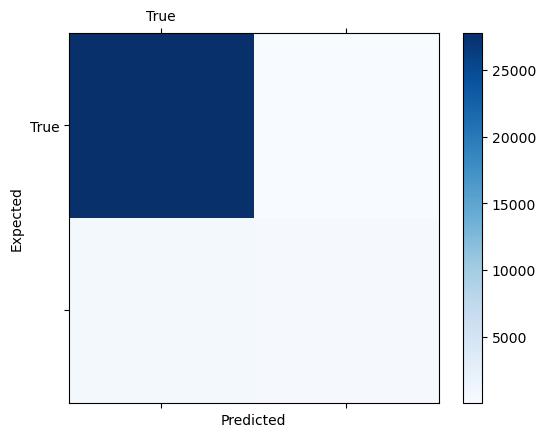

In [96]:
_plot_confusion_matrix(Y_TEST, Y_PRED)

In [97]:
target_names = ['False', 'True']
_classification_report = classification_report(Y_TEST, Y_PRED, target_names=target_names)
print(_classification_report)

              precision    recall  f1-score   support

       False       0.98      1.00      0.99     27845
        True       0.81      0.37      0.51       856

    accuracy                           0.98     28701
   macro avg       0.90      0.68      0.75     28701
weighted avg       0.98      0.98      0.97     28701



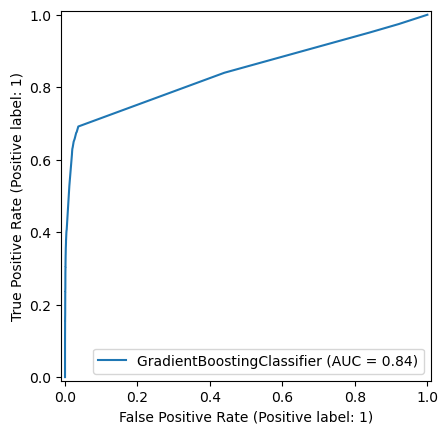

In [98]:
roc_curve(MODEL, X_TEST, Y_TEST)